<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_02_08_2021/week_3_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Tasks:

Hourly arrival data from week-1: https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv

Description: https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour_desc.txt

#Task-1:

In [66]:
import pandas as pd

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv')

In [68]:
# Counti: Total number of customers who made a transaction between (i-1):00:00 (Inclusive) and i:00:00 (Exclusive) on a given date.
data

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
4,2010-12-06,0,0,0,0,0,0,0,0,2,4,11,12,19,13,8,12,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,0,0,0,0,0,0,0,3,5,9,9,18,16,16,11,15,6,0,0,0,0,0,0
301,2011-12-06,0,0,0,0,0,0,0,0,4,6,9,17,25,10,14,8,6,6,0,0,0,0,0,0
302,2011-12-07,0,0,0,0,0,0,0,0,7,7,8,12,20,12,9,11,5,4,0,0,0,0,0,0
303,2011-12-08,0,0,0,0,0,0,0,0,1,9,7,12,19,14,7,14,6,5,7,5,1,0,0,0


In [69]:
data['Date'] = pd.to_datetime(data['Date'])

In [70]:
data.drop(data[data.Date.dt.isocalendar().year==2010].index,inplace=True)

In [71]:
weekNumber = pd.to_datetime(data['Date']).dt.isocalendar().week

In [72]:
weekNumber=pd.DataFrame(weekNumber).drop_duplicates()

In [73]:
weekNumber.reset_index(drop=True,inplace=True)

In [74]:
weekNumber[['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]=0

In [75]:
weekNumber.tail()

,week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
44,45,0,0,0,0,0,0,0
45,46,0,0,0,0,0,0,0
46,47,0,0,0,0,0,0,0
47,48,0,0,0,0,0,0,0
48,49,0,0,0,0,0,0,0


In [76]:
dates=data['Date']

In [77]:
for date in dates:
  weekNumber.loc[weekNumber['week']==date.week,date.day_name()]=1

In [78]:
weekNumber.tail()

,week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
44,45,1,1,1,1,1,1,0
45,46,1,1,1,1,1,1,0
46,47,1,1,1,1,1,1,0
47,48,1,1,1,1,1,1,0
48,49,0,1,1,1,1,1,0


In [79]:
weekly_missing_days=weekNumber

In [80]:
#weekNumber.to_csv('weekly_missing_days.csv',index=False)

In [81]:
#weekly_missing_days=pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/weekly_missing_days.csv')

In [82]:
weekly_missing_days.set_index('week',inplace=True)

In [83]:
weekly_missing_days

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
week,,,,,,,
1,1,0,1,1,1,1,0
2,1,1,1,1,1,1,0
3,1,1,1,1,1,1,0
4,1,1,1,1,1,1,0
5,1,1,1,1,1,1,0
6,1,1,1,1,1,1,0
7,1,1,1,1,1,1,0
8,1,1,1,1,1,1,0
9,1,1,1,1,1,1,0


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Heatmap for Weekly Data')

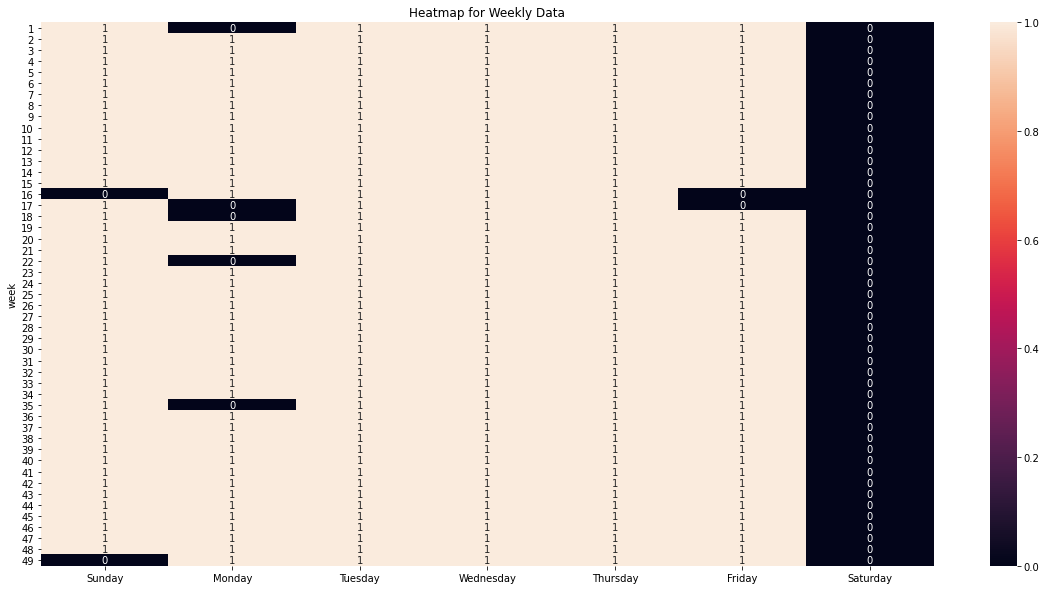

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(weekly_missing_days, annot=True)
plt.title('Heatmap for Weekly Data')